
# Python Plots
***
Below is a demonostration of different plot types using Python
***

In [2]:
# standard set of includes for plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from datetime import datetime
import bart

print("Current Time =", datetime.now())

Current Time = 2021-04-05 21:26:27.990036


## Seed Random Number Generator

In [3]:
# Seed random number generator so we get a fresh set of random numbers
np.random.seed() 

## Station Queue over time
*

*

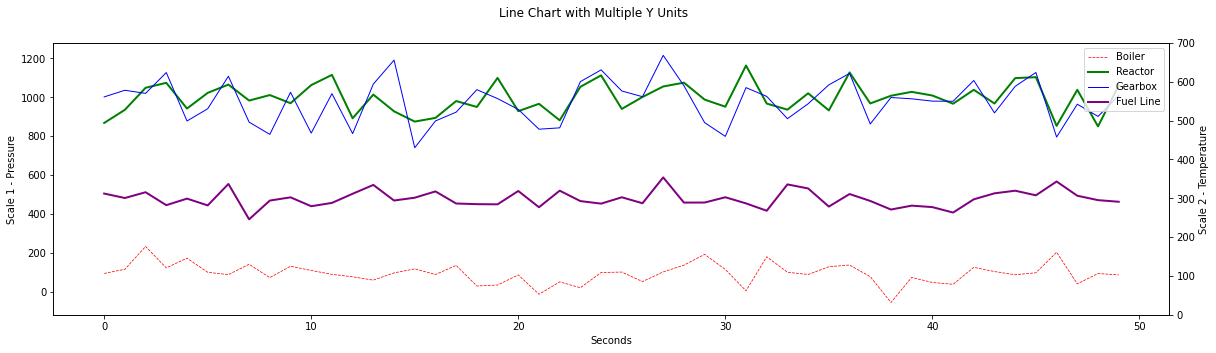

In [3]:

query = 'select sum(riders), dest, date' \
          '      from hourlystationqueue' \
           '     where '\
            '            extract(ISODOW from depart_date) in (1,2,3,4,5) '\
         '       AND '\
           '             dest = \'EMBR\' '\
            '    and ' \
         '              hour = 7 '  \
          '      and date <   \'10-Dec-2015\'   ' \
          '      and ' \
           '           extract(YEAR from date) in (2015)  ' \
           '     group by dest, date     ' 

dat = bart.PGBart(query)

def AddRandomNoise(c):
    return (c + np.random.normal(0, 100))

#define number of samples to plot
total_samples_line_chart = 50

#create x independent data
x = list( range(total_samples_line_chart) )
#generate three data sets of random values spaced throughout Y scales
y1 = np.random.normal(100, 50, total_samples_line_chart) 
y2 = np.random.normal(1000, 75, total_samples_line_chart) 
#make this set a function of correlated data set with some random noise added
y3 = list( map(AddRandomNoise, y2) ) 
y4 = np.random.normal(300, 20, total_samples_line_chart) 
#create plot figure and give it a good size
fig, ax1 = plt.subplots(figsize = (20,5))
#add curves to plot
p1, =ax1.plot(x, y1, 
         color='red',   
         linewidth=0.75,  
         linestyle='--', label = "Boiler"
        )
p2, =ax1.plot(x, y2, 
         color='green',   
         linewidth=2.0, label = "Reactor"
        )
p3, =ax1.plot(x, y3, 
         color='blue',   
         linewidth=1 , label = "Gearbox"
        )  
#create second Y axis sharing the same X axis   
ax2 = ax1.twinx()
#add data to the new Y axis
p4, =ax2.plot(x, y4, 
         color='purple',   
         linewidth=2, label = "Fuel Line"
        )    
ax2.set_ylim(0,700) 
#add a title
plt.suptitle('Line Chart with Multiple Y Units')
#set labels
ax1.set_xlabel('Seconds')
ax1.set_ylabel('Scale 1 - Pressure')
ax2.set_ylabel('Scale 2 - Temperature')

#set a legend for each data curve
lines = [p1, p2, p3, p4]
ax2.legend(lines, [l.get_label() for l in lines])
plt.show()

## Bar Chart
*
Bar charts are generally used for comparing categories for total data values, such as sales per outlet or populations per county.
In this bar chart example, we create the X categories as string equivalents of a number line
The category bins are random values with a wide range to help illustrate the bars
*

Current Time = 2021-04-05 20:03:58.029647


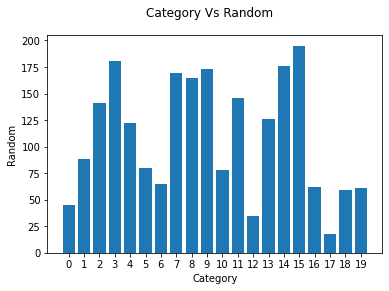

In [5]:
print("Current Time =", datetime.now())
#set total samples
total_samples_bar_chart = 20
#create category names from integers
cat_names = [str(i) for i in range(total_samples_bar_chart)]
#create random data bars
random_values = random.sample(range(10, 200), total_samples_bar_chart)
#add data to bar chart
plt.bar(cat_names, random_values)
plt.suptitle('Category Vs Random')
plt.xlabel('Category')
plt.ylabel('Random')
plt.show()

## Scatter Plot
*
The Scatter plot is generally used to show how 2 or more variables vary with one another.  
In this example, x samples are first created as random values, then our Y samples are functions of X with some random
noise added to give it some "scatter.
In addition, we adjust the alpha of each sample to show some options available when presenting a scatter plot
*

Current Time = 2021-04-05 20:03:58.423885


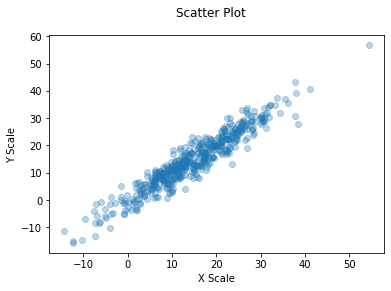

In [6]:
print("Current Time =", datetime.now())
# Create data, random numbers with some cohesion so they look interesting
number_of_scatter_points = 500
x = np.random.normal(15, 10, number_of_scatter_points) 
y = x + np.random.normal(0, 3, number_of_scatter_points) 
# Plot
plt.scatter(x, y, alpha=.3)
plt.suptitle('Scatter Plot')
plt.xlabel('X Scale')
plt.ylabel('Y Scale')
plt.show()

## Histogram
*Histograms are used to show frequency of data or categories comparatively.  In this example, we generated a large number
of normally distributed samples randomly, then plotted in a hitrogram format.  This is a good example that shows how a Histogram is 
generally used to display categories and frequency of occurance
If we set this correctly, then we should see a nice normal curve centered on 0
*

Current Time = 2021-04-05 20:03:58.704166


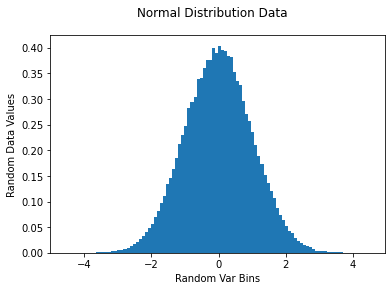

In [7]:
print("Current Time =", datetime.now())
#set the mean and std deviation for normal random variables
#lets go with normal 0,1 as that gives a nice normal curve
mu, sigma = 0, 1 # mean and standard deviation
#generate random vars normally distributed
x = np.random.normal(mu, sigma, 100000)
#build histogram plot
count, bins, ignored = plt.hist(x, 100, density=True)
#show plot
plt.suptitle("Normal Distribution Data")
plt.xlabel('Random Var Bins')
plt.ylabel('Random Data Values')
plt.show()

## Box Plot
*Box plots are a great tool for showing how a category of data is distributed.  The median, and sample spread is shown as quartiles,
making it easy to see outliers and where the bulk of data is spread around a median value.
In this example, we demonstrate how to show multiple box plots on the same plot for easy distribution comparisons.

In this example, we use numeric values for each box plot instance
*

Current Time = 2021-04-05 20:03:59.239866


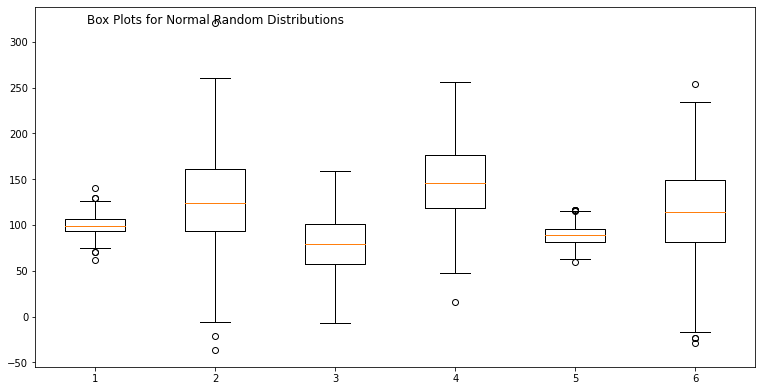

In [8]:
print("Current Time =", datetime.now())
#set total sample number
tot_bp_samples = 500
#generate random data using normals
#spread them out a bit, so they look different
data_1 = np.random.normal(100, 10, tot_bp_samples) 
data_2 = np.random.normal(125, 50, tot_bp_samples) 
data_3 = np.random.normal(80, 30, tot_bp_samples) 
data_4 = np.random.normal(150, 40, tot_bp_samples) 
data_5 = np.random.normal(90, 10, tot_bp_samples) 
data_6 = np.random.normal(115, 50, tot_bp_samples) 
data = [data_1, data_2, data_3, data_4, data_5, data_6] 
#set the size of the plot
fig = plt.figure(figsize =(5, 5)) 
# Creating axes instance, and use the parameters to set the dimensions of the plot
# in this case, we give the length some extra relative room
ax = fig.add_axes([0, 0, 2, 1]) 
  
# Creating plot 
bp = ax.boxplot(data) 
# show plot 
plt.suptitle('Box Plots for Normal Random Distributions')
plt.show() 

## Heat Map Plot
*Heat map plots are very visually appealing for highlighting areas of interest or intensity.  Heat maps are like scatter
plots, but with the added third dimension of intensity.  Heat maps are good for drawing attention to specific areas of high or intense
correlation between two variables.
In this example, we use subplots to create two heat maps, one with random data and one with a highly correlated 2-D grid of increasing
values.  The two plots are done with "hot" and "cool" temperature maps.  These can be done to draw attention to high or low correlated X-Y data pairs.
*

Current Time = 2021-04-05 20:03:59.539632


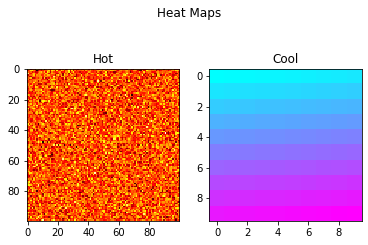

In [9]:
print("Current Time =", datetime.now())
#build subplots for showing two heat maps
fig, (ax1, ax2) = plt.subplots(1, 2)
#create some random data
data = np.random.normal(0, 100, size=(100, 100))
ax1.imshow(data, cmap='hot', interpolation='nearest')
#this is a bit of a trick to create a 2D matrix
#first create a long array, then chunk it up or reshape to a 2D matrix
data = np.reshape(np.arange(0,100),(10,10))
#add a little random noise to it
data = data + np.random.normal(0,5)
#build plot
ax2.imshow(data, cmap='cool', interpolation='nearest')
#show plot
plt.suptitle("Heat Maps")
ax1.set_title("Hot")
ax2.set_title("Cool")
plt.show()

## Area Plot
*Area plots are somewhat like standard line charts, but with filled in area color below the curve.  This is usually done when the data presented
has an attribute of volume, such as "gallons of flow over time" or something with the assumption of volume.  This helps the user immediately
understand or absorb the concept of volume or size or content of the data being plotted.
In this example, we use subplots to generate a grid of plots in a 2x2 matrix to help show how to lay out multiple plots.
We set the "sharedx,sharedy" axis to true to demonstrate how to set all four plots to use the same axis.  This can be especially useful
when comparing data over time or other x-scale factor
*

Current Time = 2021-04-05 20:03:59.940581


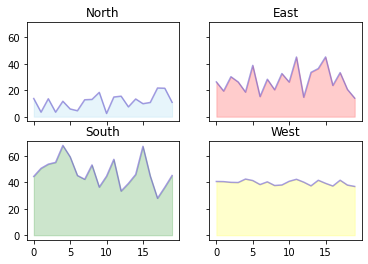

In [10]:
print("Current Time =", datetime.now())
#set total sample size
total_samples_area = 20
#create subplots
fig, ax = plt.subplots(2, 2, sharex=True,sharey=True)
#build data sets
x1 = list( range(total_samples_area) )
y1 = np.random.normal(10, 5, total_samples_area)
y2 = np.random.normal(30, 8, total_samples_area)
y3 = np.random.normal(50, 10, total_samples_area)
y4 = np.random.normal(40, 2, total_samples_area)

#populate the different area plots with random data
#set colors and any other unique attributes per plot
ax[0,0].fill_between( x1, y1, color="skyblue", alpha=0.2)
ax[0,0].plot(x1, y1, color="Slateblue", alpha=0.6)
ax[0,0].set_title('North')

ax[0,1].fill_between( x1, y2, color="red", alpha=0.2)
ax[0,1].plot(x1, y2, color="Slateblue", alpha=0.6)
ax[0,1].set_title('East')

ax[1,0].fill_between( x1, y3, color="green", alpha=0.2)
ax[1,0].plot(x1, y3, color="Slateblue", alpha=0.6)
ax[1,0].set_title('South')

ax[1,1].fill_between( x1, y4, color="yellow", alpha=0.2)
ax[1,1].plot(x1, y4, color="Slateblue", alpha=0.6)
ax[1,1].set_title('West')

#show plot
plt.title="Square miles flooded per day"
plt.show()


## Polar Plots
*
Polar plots are good for displaying vector type data, that has a magnitude and phase or direction.  
In this example, we create 3 polar plots to illustrate how to present different types of vector data.
In the first plot, we do not connect the lines and show each sample as a separate dot.  This is a good format when the data samples are not sampled by time, and connecting the lines would imply an autocorrelation between samples.
The second plot shows connected lines and shows how we are looking at line chart type data, but in a 360 degree visualization.  Notice how your vision tends to look at the first sample and follow it from start to end.  This can be a great format for displaying vector data that was sampled by time.
The third plot shows how the data was sampled by time, but the values are jumping all around the radius making for a hard to read format.  In this case, while the polar plot does convey the data well, other formats, such as two stacked time series with amp and phase plotted separately, could be another choice if the polar format is simply too messy to read.
*



Current Time = 2021-04-05 20:04:00.516002


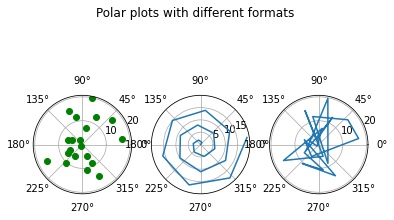

In [11]:
print("Current Time =", datetime.now())
#set total samples
total_polar_samples = 20
#function to add some randomness to the data
def AddRandomNoise(c):
    return (c + np.random.normal(0, 5))
#converter from degrees to radians
def DegToRad(d):
    return np.radians(d)
#create X, or phase, data set with some random noise
x1 = list( map(AddRandomNoise, list( range(total_polar_samples) )) )
#create Y, or magnitude, data
y1 = np.random.normal(10, 5, total_polar_samples) 
#create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, subplot_kw=dict(projection='polar'))
#populate plots
ax1.plot( x1, y1,'go' )
ax3.plot(x1,y1)
ax2.plot(list( range(20) ),list( range(20) ))

#show plots
plt.suptitle("Polar plots with different formats")
plt.show()
